# JUICE ORBIT QL -- 2024/2/18

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import spiceypy as spice
from astropy.constants import au
# from matplotlib import patches

### SPICE test

In [2]:
spice.tkvrsn("TOOLKIT")

'CSPICE_N0067'

### Import JUICE Lib

In [3]:
sys.path.append("./lib/")
# Load SPICE kernels
import juice_spice_lib as juice_spice

### load SPICE ketnels

In [4]:
spice_dir = '/Users/user/OneDrive-Univ/data/data-JUICE/spice/juice/kernels/'
juice_spice.spice_ini(spice_dir)

# JUICE orbit near Earth

In [5]:
# set date/time
utctim = "2024-08-15T00:00:00"      # start date/time
l_date = 10                         # date
dt = 60                             # time step [second]
nd = l_date * 3600 * 24 / dt        # number of data

et_ex = spice.str2et(utctim)        # seconds
et = et_ex + dt * np.arange(0, nd)

# calculate target position with spice
x, y, z, r, lat, lon = juice_spice.get_juice_pos_earth(et, x_ref="SUN")

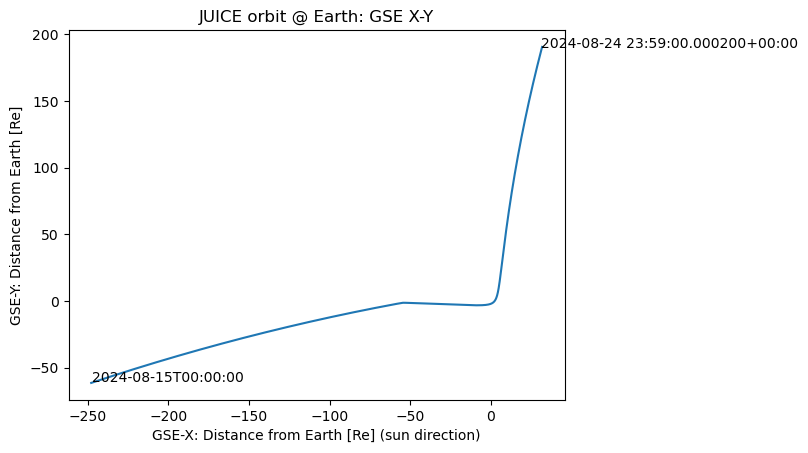

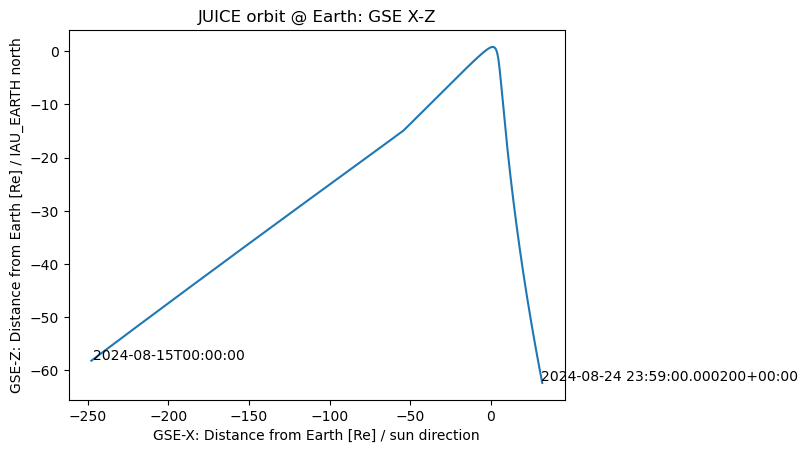

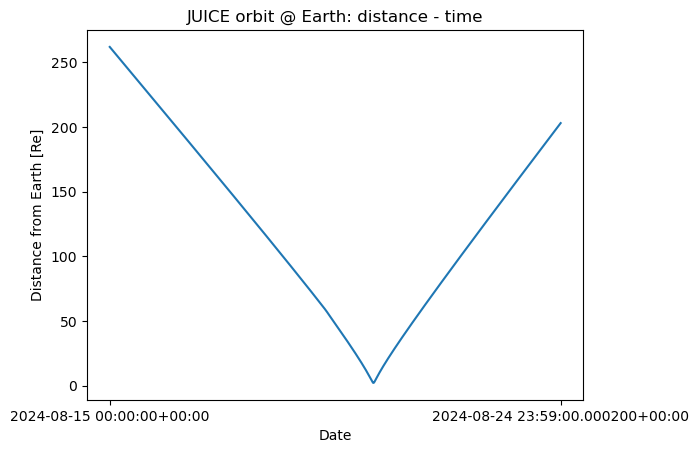

In [6]:
# plot
re = 6378.137  # km
plt.plot(x / re, y / re)  # x 地球から見た太陽方向
plt.title("JUICE orbit @ Earth: GSE X-Y")
plt.xlabel("GSE-X: Distance from Earth [Re] (sun direction)")
plt.ylabel("GSE-Y: Distance from Earth [Re]")
plt.text(int(x[0] / re), int(y[0] / re), utctim)
plt.text(int(x[-1] / re), int(y[-1] / re), spice.et2datetime(et[-1]))
plt.show()

# plot
plt.plot(x / re, z / re)  # x 地球から見た太陽方向
plt.title("JUICE orbit @ Earth: GSE X-Z")
plt.xlabel("GSE-X: Distance from Earth [Re] / sun direction")
plt.ylabel("GSE-Z: Distance from Earth [Re] / IAU_EARTH north")
plt.text(int(x[0] / re), int(z[0] / re), utctim)
plt.text(int(x[-1] / re), int(z[-1] / re), spice.et2datetime(et[-1]))
plt.show()

# plot
plt.plot(et, r / re)  # x 地球から見た太陽方向
plt.title("JUICE orbit @ Earth: distance - time")
plt.xlabel("Date")
plt.ylabel("Distance from Earth [Re]")

x_values = [et[0], et[-1]]
x_labels = [spice.et2datetime(et[0]), spice.et2datetime(et[-1])]
plt.xticks(x_values, x_labels)
plt.show()

# JUICE orbit around Moon

In [7]:
# set date/time
utctim = "2024-08-19T18:00:00"      # start date/time
l_date = .1                         # date
dt = 60                             # time step [second]
nd = l_date * 3600 * 24 / dt        # number of data

et_ex = spice.str2et(utctim)        # seconds
et = et_ex + dt * np.arange(0, nd)

# calculate target position with spice
x, y, z, r, lat, lon = juice_spice.get_juice_pos_moon(et, x_ref="SUN")

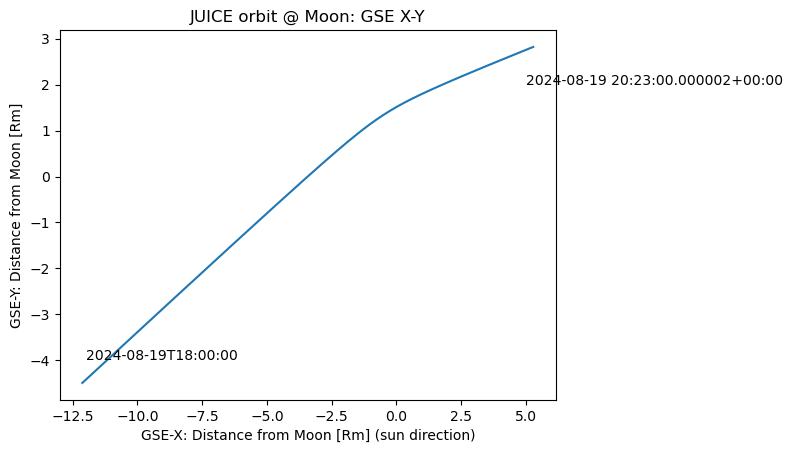

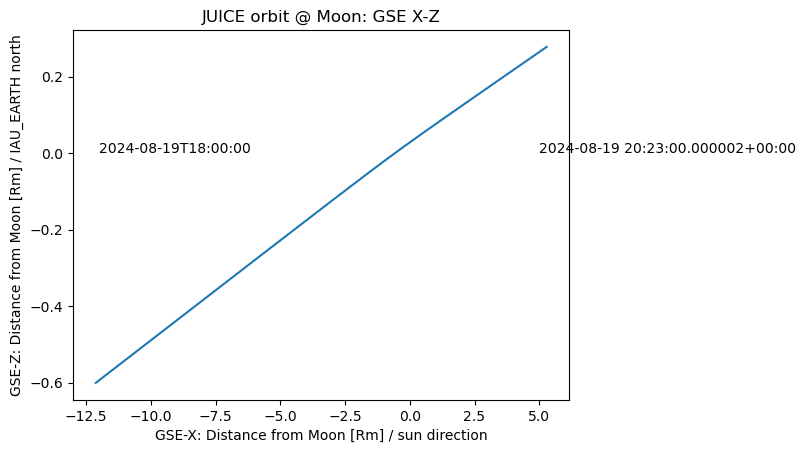

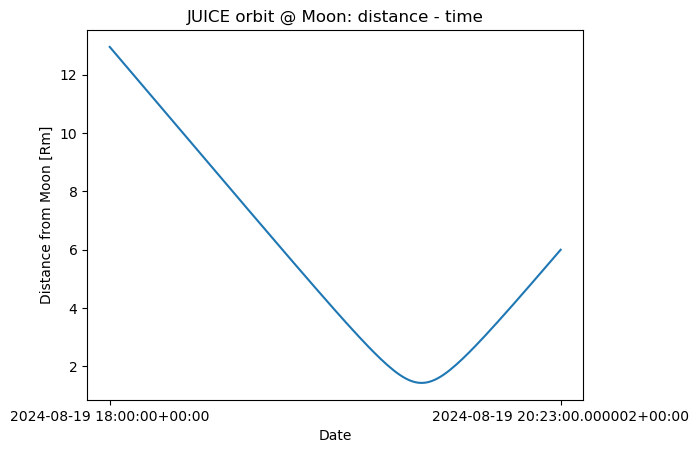

In [8]:
# plot
re = 1737.4  # km
plt.plot(x / re, y / re)  # x 地球から見た太陽方向
plt.title("JUICE orbit @ Moon: GSE X-Y")
plt.xlabel("GSE-X: Distance from Moon [Rm] (sun direction)")
plt.ylabel("GSE-Y: Distance from Moon [Rm]")
plt.text(int(x[0] / re), int(y[0] / re), utctim)
plt.text(int(x[-1] / re), int(y[-1] / re), spice.et2datetime(et[-1]))
plt.show()

# plot
plt.plot(x / re, z / re)  # x 地球から見た太陽方向
plt.title("JUICE orbit @ Moon: GSE X-Z")
plt.xlabel("GSE-X: Distance from Moon [Rm] / sun direction")
plt.ylabel("GSE-Z: Distance from Moon [Rm] / IAU_EARTH north")
plt.text(int(x[0] / re), int(z[0] / re), utctim)
plt.text(int(x[-1] / re), int(z[-1] / re), spice.et2datetime(et[-1]))
plt.show()

# plot
plt.plot(et, r / re)  # x 地球から見た太陽方向
plt.title("JUICE orbit @ Moon: distance - time")
plt.xlabel("Date")
plt.ylabel("Distance from Moon [Rm]")

x_values = [et[0], et[-1]]
x_labels = [spice.et2datetime(et[0]), spice.et2datetime(et[-1])]
plt.xticks(x_values, x_labels)
plt.show()

# JUICE orbit from Earth to Jupiter

In [9]:
# set date/time
utctim = "2023-04-14T00:00:00"  # start date/time
et_ex = spice.str2et(utctim)  # seconds
nd = 365 * 10  # number of data
dt = 60 * 60 * 24  # time step [second]
et = et_ex + dt * np.arange(0, nd)

# calculate target position with spice
x, y, z, r, lat, lon = juice_spice.get_juice_pos_sun(et, x_ref="JUPITER")

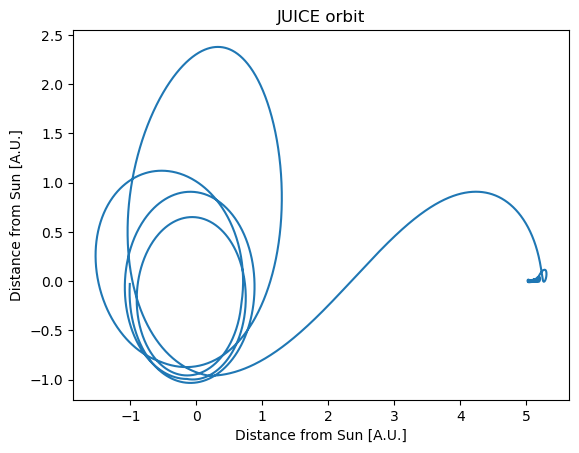

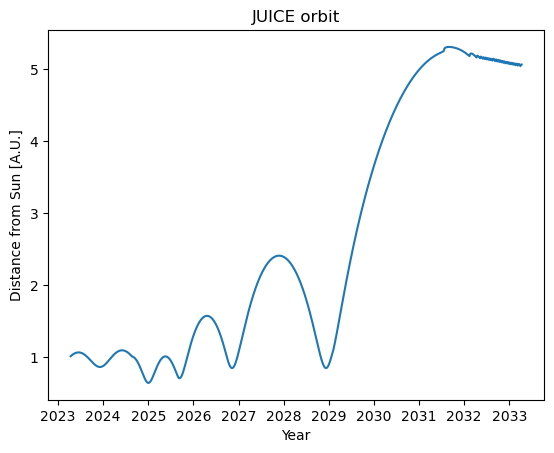

In [10]:
# plot
au_km = au * 1e-3
plt.plot(x / au_km, y / au_km)
plt.title("JUICE orbit")
plt.xlabel("Distance from Sun [A.U.]")
plt.ylabel("Distance from Sun [A.U.]")
plt.show()

# plot
td = spice.et2datetime(et)
plt.plot(td, r / au_km)
plt.title("JUICE orbit")
plt.xlabel("Year")
plt.ylabel("Distance from Sun [A.U.]")
plt.show()

# JUICE orbit around Jupiter (after JOI)

In [11]:
# set date/time
utctim = "2031-06-01T00:00:00"  # start date/time
et_ex = spice.str2et(utctim)  # seconds
nd = 24 * 365 * 4  # number of data
dt = 60 * 60  # time step [second]
et = et_ex + dt * np.arange(0, nd)

# calculate target position with spice
x, y, z, r, lat, lon = juice_spice.get_juice_pos_jup(et, x_ref="SUN")

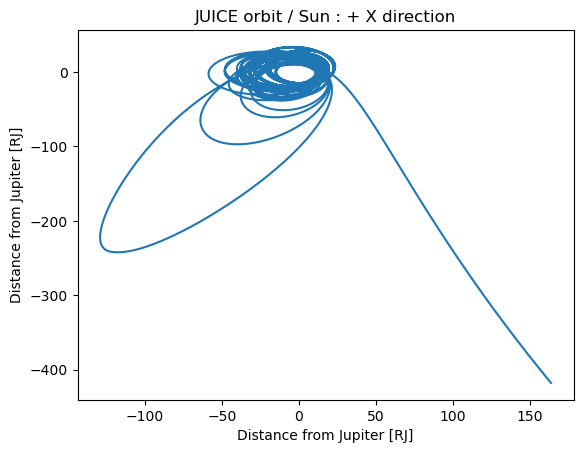

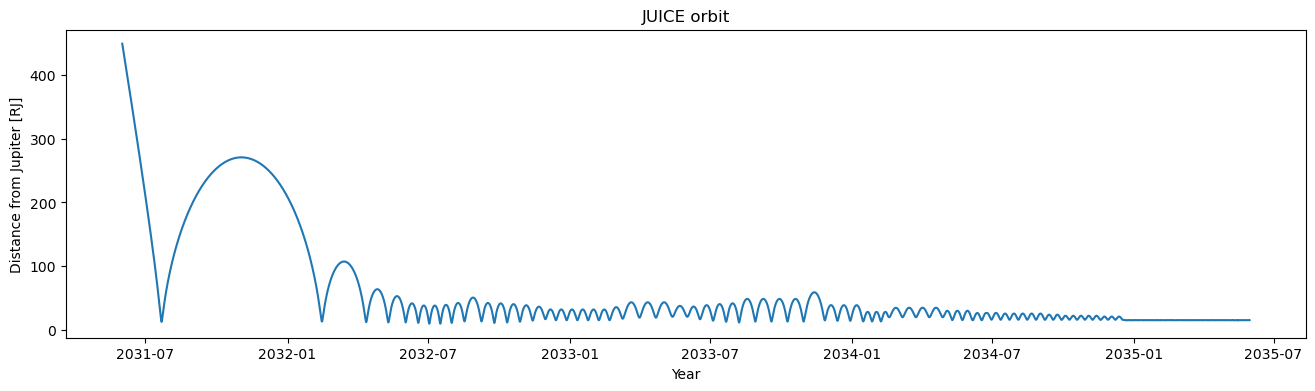

In [12]:
# plot
rj = 71400.0  # [km]
plt.plot(x / rj, y / rj)
plt.title("JUICE orbit / Sun : + X direction")
plt.xlabel("Distance from Jupiter [RJ]")
plt.ylabel("Distance from Jupiter [RJ]")
plt.show()

# plot
td = spice.et2datetime(et)
rj = 71400.0  # [km]
plt.figure(figsize=(16, 4))
plt.plot(td, r / rj)
plt.title("JUICE orbit")
plt.xlabel("Year")
plt.ylabel("Distance from Jupiter [RJ]")
plt.show()

# Jupiter orbit around Ganymede (check IAU_GANYMEDE)

In [13]:
# set date/time
utctim = "2020-01-01T00:00:00"  # start date/time
et_ex = spice.str2et(utctim)  # seconds
nd = 365 * 12  # number of data
dt = 24 * 60 * 60  # time step [second]
et = et_ex + dt * np.arange(0, nd)

# calculate target position with spice
x, y, z, r, lat, lon = juice_spice.get_pos(et, "IAU_GANYMEDE", "JUPITER", "GANYMEDE")

Text(0, 0.5, 'longitude [deg]')

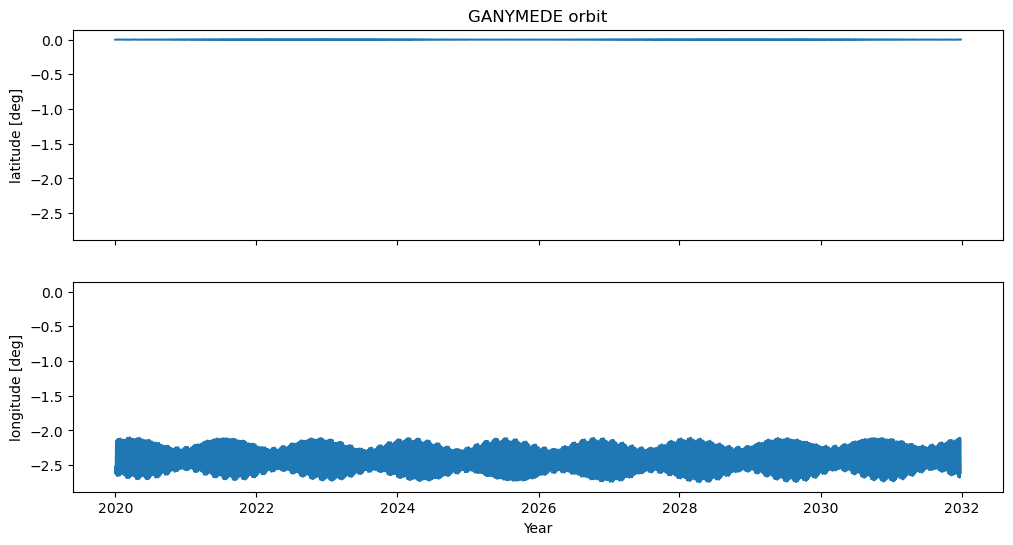

In [14]:
td = spice.et2datetime(et)

fig, (ax1, ax2) = plt.subplots(2, figsize=(12.0, 6.0), sharex=True, sharey=True)

ax1.plot(td, lat * 180.0 / np.pi)
ax1.set_title("GANYMEDE orbit")
ax1.set_ylabel("latitude [deg]")

ax2.plot(td, lon * 180.0 / np.pi)
ax2.set_xlabel("Year")
ax2.set_ylabel("longitude [deg]")

# JUICE orbit around Ganymede

In [15]:
# set date/time
utctim = "2034-11-01T00:00:00"  # start date/time
et_ex = spice.str2et(utctim)  # seconds
nd = 24 * 30 * 11  # number of data
dt = 60 * 60  # time step [second]
et = et_ex + dt * np.arange(0, nd)

# calculate target position with spice
x, y, z, r, lat, lon = juice_spice.get_pos(et, "IAU_GANYMEDE", "JUICE", "GANYMEDE")

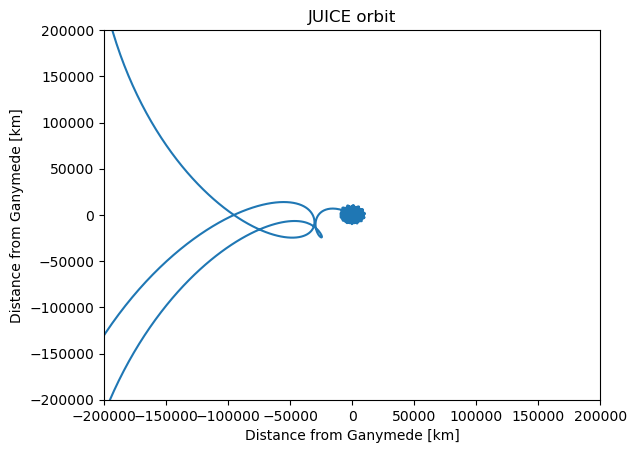

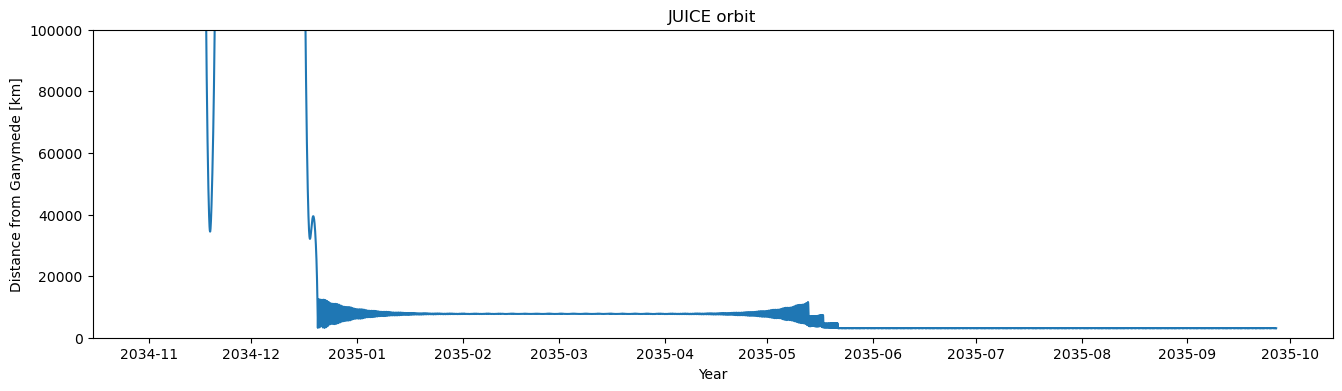

In [16]:
# plot
plt.plot(x, y)
range = 200000.0

plt.xlim(-range, range)
plt.ylim(-range, range)
plt.title("JUICE orbit")
plt.xlabel("Distance from Ganymede [km]")
plt.ylabel("Distance from Ganymede [km]")
plt.show()

# plot
td = spice.et2datetime(et)
plt.figure(figsize=(16, 4))
plt.plot(td, r)
plt.ylim(0.0, 100000.0)
plt.title("JUICE orbit")
plt.xlabel("Year")
plt.ylabel("Distance from Ganymede [km]")
plt.show()

# JUICE orbit close to Ganymede

In [17]:
# set date/time
utctim = "2034-12-15T00:00:00"  # start date/time
et_ex = spice.str2et(utctim)  # seconds
nd = 60 * 24 * 30 * 5  # number of data
dt = 60  # time step [second]
et = et_ex + dt * np.arange(0, nd)

# calculate target position with spice
x, y, z, r, lat, lon = juice_spice.get_pos(et, "IAU_GANYMEDE", "JUICE", "GANYMEDE")

Text(0, 0.5, 'Z distance from Ganymede [Rg]')

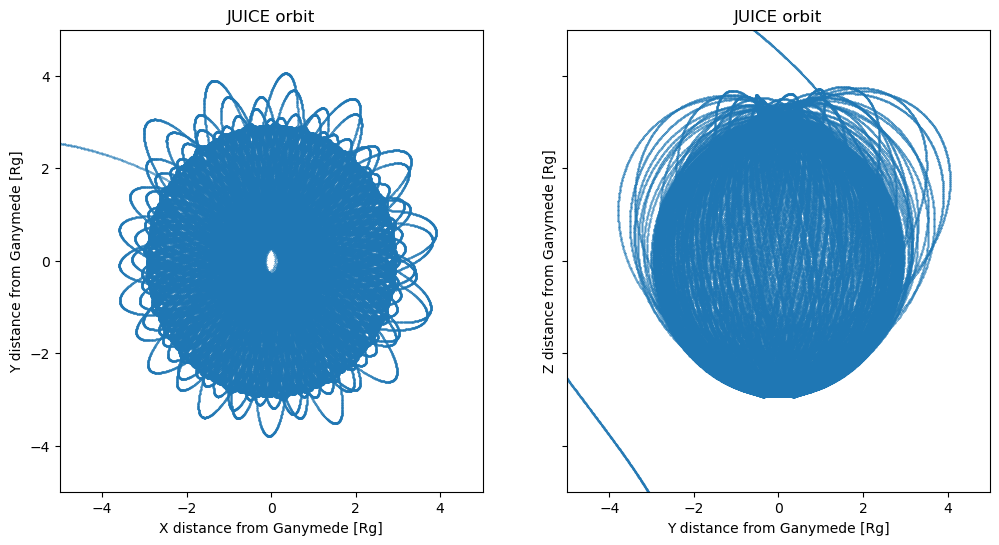

In [18]:
rg = 2634.1  # [km]
idx = np.where(r < 20000.0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12.0, 6.0), sharex=True, sharey=True)

ax1.scatter(x / rg, y / rg, s=0.1)
range = 5.0
ax1.set_xlim(-range, range)
ax1.set_ylim(-range, range)
ax1.set_title("JUICE orbit")
ax1.set_xlabel("X distance from Ganymede [Rg]")
ax1.set_ylabel("Y distance from Ganymede [Rg]")

ax2.scatter(y / rg, z / rg, s=0.1)
range = 5.0
ax2.set_xlim(-range, range)
ax2.set_ylim(-range, range)
ax2.set_title("JUICE orbit")
ax2.set_xlabel("Y distance from Ganymede [Rg]")
ax2.set_ylabel("Z distance from Ganymede [Rg]")

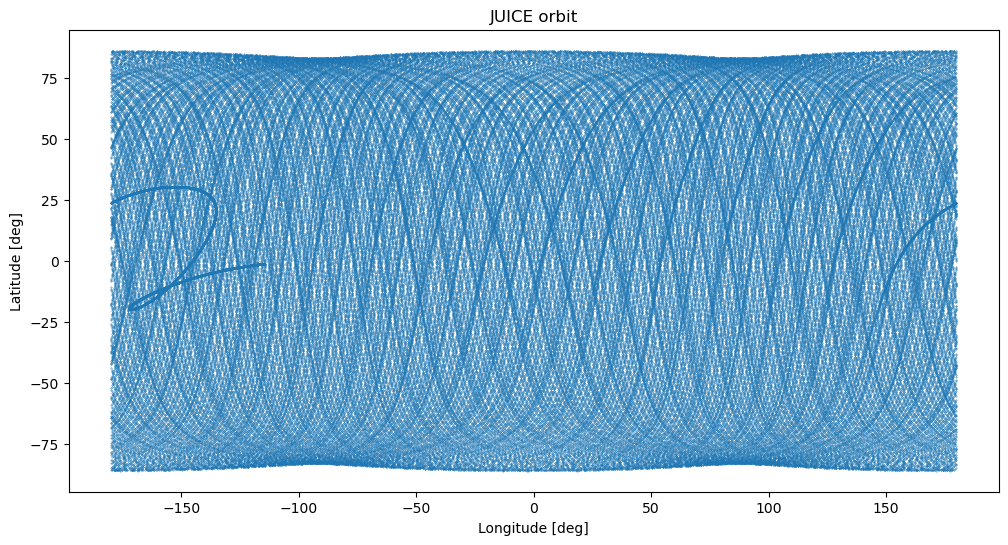

In [19]:
plt.figure(figsize=(12, 6))
plt.scatter(lon * 180.0 / np.pi, lat * 180.0 / np.pi, s=0.1)
plt.title("JUICE orbit")
plt.xlabel("Longitude [deg]")
plt.ylabel("Latitude [deg]")
plt.show()

In [20]:
# set date/time
utctim = "2035-05-20T00:00:00"  # start date/time
et_ex = spice.str2et(utctim)  # seconds
nd = 60 * 24 * 120  # number of data
dt = 60  # time step [second]
et = et_ex + dt * np.arange(0, nd)

# calculate target position with spice
x, y, z, r, lat, lon = juice_spice.get_pos(et, "IAU_GANYMEDE", "JUICE", "GANYMEDE")

Text(0, 0.5, 'Z distance from Ganymede [Rg]')

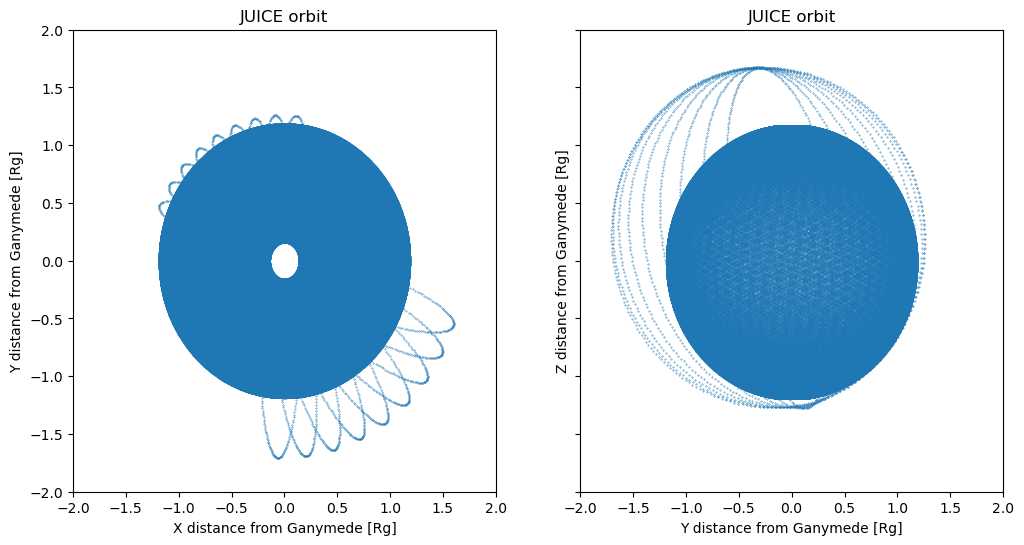

In [21]:
rg = 2634.1  # [km]
idx = np.where(r < 20000.0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12.0, 6.0), sharex=True, sharey=True)

ax1.scatter(x / rg, y / rg, s=0.1)
range = 2.0
ax1.set_xlim(-range, range)
ax1.set_ylim(-range, range)
ax1.set_title("JUICE orbit")
ax1.set_xlabel("X distance from Ganymede [Rg]")
ax1.set_ylabel("Y distance from Ganymede [Rg]")

ax2.scatter(y / rg, z / rg, s=0.1)
range = 2.0
ax2.set_xlim(-range, range)
ax2.set_ylim(-range, range)
ax2.set_title("JUICE orbit")
ax2.set_xlabel("Y distance from Ganymede [Rg]")
ax2.set_ylabel("Z distance from Ganymede [Rg]")

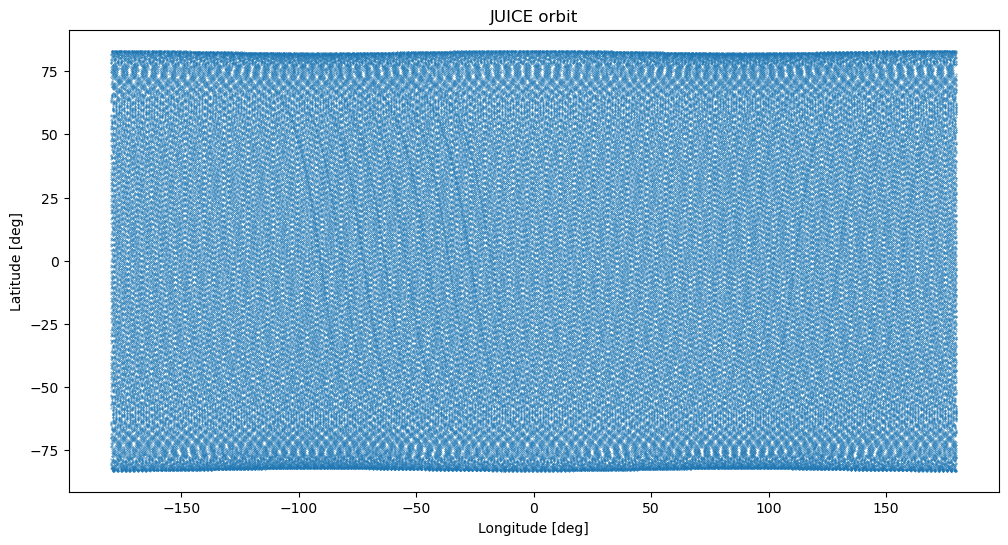

In [22]:
plt.figure(figsize=(12, 6))
plt.scatter(lon * 180.0 / np.pi, lat * 180.0 / np.pi, s=0.1)
plt.title("JUICE orbit")
plt.xlabel("Longitude [deg]")
plt.ylabel("Latitude [deg]")
plt.show()

# JUICE orbit close to Venus

In [23]:
# set date/time
# utctim = "2025-08-31T04:00:00"  # start date/time
utctim = "2026-08-31T04:00:00"  # start date/time
et_ex = spice.str2et(utctim)  # seconds
nd = 100  # number of data
dt = 24 * 60 * 60  # time step [second]
et = et_ex + dt * np.arange(0, nd)
td = spice.et2datetime(et)
# calculate target position with spice
x, y, z, r, lat, lon = juice_spice.get_juice_pos_venus(et, x_ref="SUN")

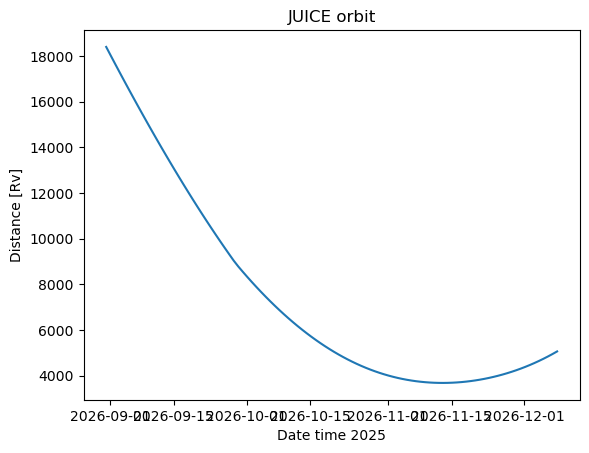

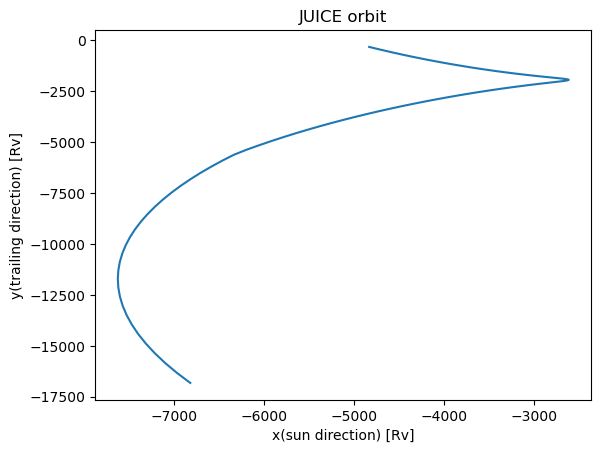

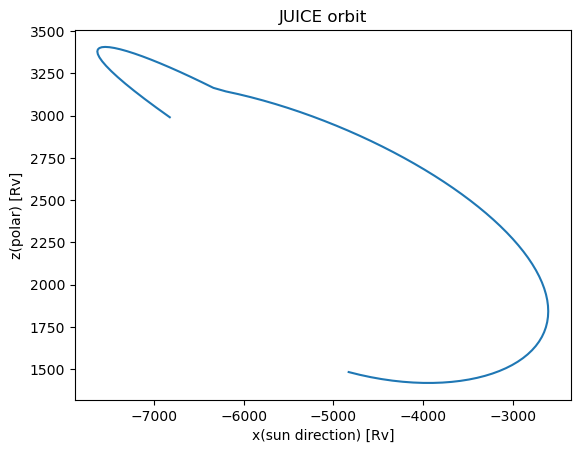

In [24]:
# plot
re = 6051.8  # km
plt.plot(td, r / re)  # x 地球から見た太陽方向
plt.title("JUICE orbit")
plt.ylabel("Distance [Rv]")
plt.xlabel("Date time 2025")
plt.show()

# %%
plt.plot(x / re, y / re)  # x 地球から見た太陽方向
plt.title("JUICE orbit")
plt.xlabel("x(sun direction) [Rv]")
plt.ylabel("y(trailing direction) [Rv]")
plt.show()
# %%
plt.plot(x / re, z / re)  # x 地球から見た太陽方向
plt.title("JUICE orbit")
plt.xlabel("x(sun direction) [Rv]")
plt.ylabel("z(polar) [Rv]")
plt.show()
# %%
